In [41]:
import pandas as pd 
import numpy as np
import hvplot.pandas
import matplotlib.pyplot as plt 
import seaborn as sns
from pandas_datareader import data
import pandas_datareader as pdr
from pathlib import Path 

import dash
import dash_core_components as dcc
import dash_html_components as html

'''
Data Frames created:
broker_file = data from broker with [tickers, shares, last, close, mktvalue]
price_df = daily ytd prices of all positions 
daily_percent_change = daily percent change of all tickers
ticker_position= ticker and shares for each position
weightings = weights of all positions in the portfolio based on market value
'''


'\nData Frames created:\nshf_positions = data from broker with tickers, shares\nprice_df = daily ytd prices of all positions \ndaily_percent_change = daily percent change of all tickers\n'

In [152]:
cash= 26572.84
broker_file =pd.read_csv(Path('shf_positions.csv'))
daily_balance = pd.read_csv(
    Path('daily_balance.csv'),
    parse_dates=True,
    infer_datetime_format = True
)

daily_balance.replace(',','', regex=True, inplace=True)
daily_balance['Account value'] = daily_balance['Account value'].astype(float)
daily_balance.info()
display(broker_file.head())
display(daily_balance.head(30))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           233 non-null    object 
 1   Account value  230 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.8+ KB


,Symbol,Description,Qty,Last,Close,Mkt value,Gain ($),Gain (%),Cost/share,P/E
0,CCJ,Cameco Corporation Common Stock,500,25.29,26.64,"12,645.00","9,118.69",258.59%,7.05262,--
1,ARKK,ARK Innovation ETF,70,113.24,113.82,"7,936.60","5,342.32",205.93%,37.06114,--
2,ARKG,ARK Genomic Revolution ETF,85,68.53,69.12,"5,825.90","3,400.63",140.22%,28.53259,--
3,XLK,SPDR Select Sector Fund - Technology,420,171.31,170.07,"71,950.20","35,672.07",98.33%,86.37650,--
4,DG,Dollar General Corporation Common Stock,160,224.55,222.34,"35,928.00","17,194.17",91.78%,117.08644,21.30X


,Date,Account value
0,1/1/2021,676001.97
1,1/4/2021,668975.07
2,1/5/2021,670881.32
3,1/6/2021,676514.02
4,1/7/2021,683265.92
5,1/8/2021,683083.67
6,1/11/2021,680838.52
7,1/12/2021,678830.72
8,1/13/2021,678664.62
9,1/14/2021,677617.47


In [126]:
#cleaning file --getting rid of commas in str and converting to floats instead of objects
broker_file.replace(',','', regex=True, inplace=True)
broker_file['Mkt value'] =broker_file['Mkt value'].astype(float)
aum = broker_file['Mkt value'].sum() + cash 
aum

793758.1399999999

In [129]:
tickers  = shf_positions['Symbol'].tolist()
weights = []

for i in broker_file:
    weight = broker_file['Mkt value']/aum
    weights.append(weight)
    break
ticker_weights = list(zip(tickers, weights))

ticker_weights

[('CCJ',
  0     0.015931
  1     0.009999
  2     0.007340
  3     0.090645
  4     0.045263
  5     0.011024
  6     0.013058
  7     0.054507
  8     0.016191
  9     0.035455
  10    0.039781
  11    0.020584
  12    0.150768
  13    0.079366
  14    0.049285
  15    0.028850
  16    0.018419
  17    0.050059
  18    0.090771
  19    0.027391
  20    0.037644
  21    0.025436
  22    0.013787
  23    0.014452
  24    0.004305
  25    0.016214
  Name: Mkt value, dtype: float64)]

In [128]:
# creating ticker list 
#importing data
symbol= tickers
start='2020-12-31'
end='2021-11-19'

price_df=data.get_data_yahoo(symbol, start, end)['Close']
price_df.head()


C:\Users\jmuen\anaconda3\envs\viz\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'BRK.B', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


Symbols,CCJ,ARKK,ARKG,XLK,DG,NKE,FB,INFO,BA,SPY,...,EA,XLP,DGS,C,XLU,VZ,T,PAA,SND,BRK.B
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-31,13.40,124.489998,93.260002,130.020004,210.300003,141.470001,273.160004,89.830002,214.059998,373.880005,...,143.600006,67.449997,47.720001,61.660000,62.700001,58.750000,28.760000,8.24,1.72,NaN
2021-01-04,13.39,124.690002,93.139999,127.900002,209.710007,140.100006,268.940002,90.910004,202.720001,368.790009,...,139.509995,66.720001,47.959999,60.139999,61.119999,58.849998,29.440001,8.20,1.93,NaN
2021-01-05,14.57,127.760002,94.375000,128.729996,206.729996,141.229996,270.970001,89.809998,211.630005,371.329987,...,141.320007,66.720001,48.520000,61.700001,61.110001,58.580002,29.260000,8.69,1.82,NaN
2021-01-06,14.42,128.229996,95.279999,126.510002,215.309998,142.350006,263.309998,90.260002,211.029999,373.549988,...,136.800003,66.769997,48.380001,65.250000,62.630001,59.290001,29.830000,9.16,1.92,NaN
2021-01-07,14.68,138.380005,103.379997,129.919998,217.720001,144.949997,268.739990,90.879997,212.710007,379.100006,...,140.740005,66.570000,48.619999,66.019997,61.810001,58.529999,29.910000,9.63,2.04,NaN


In [130]:
#creating daily percent change df 

daily_percent_change = price_df.pct_change()
daily_percent_change = daily_percent_change[1:]
daily_percent_change.head(30)

Symbols,CCJ,ARKK,ARKG,XLK,DG,NKE,FB,INFO,BA,SPY,...,EA,XLP,DGS,C,XLU,VZ,T,PAA,SND,BRK.B
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,-0.000746,0.001607,-0.001287,-0.016305,-0.002805,-0.009684,-0.015449,0.012023,-0.052976,-0.013614,...,-0.028482,-0.010823,0.005029,-0.024651,-0.025199,0.001702,0.023644,-0.004854,0.122093,NaN
2021-01-05,0.088125,0.024621,0.013260,0.006489,-0.014210,0.008066,0.007548,-0.012100,0.043952,0.006887,...,0.012974,0.000000,0.011676,0.025939,-0.000164,-0.004588,-0.006114,0.059756,-0.056995,NaN
2021-01-06,-0.010295,0.003679,0.009589,-0.017245,0.041503,0.007930,-0.028269,0.005011,-0.002835,0.005979,...,-0.031984,0.000749,-0.002885,0.057536,0.024873,0.012120,0.019481,0.054085,0.054945,NaN
2021-01-07,0.018031,0.079155,0.085013,0.026954,0.011193,0.018265,0.020622,0.006869,0.007961,0.014857,...,0.028801,-0.002995,0.004961,0.011801,-0.013093,-0.012818,0.002682,0.051310,0.062500,NaN
2021-01-08,-0.025204,0.029628,0.023989,0.006465,-0.008773,0.009659,-0.004354,-0.009133,-0.013211,0.005698,...,0.007958,0.004957,0.008021,-0.009845,0.008413,-0.012472,-0.029756,-0.019730,-0.053922,NaN
2021-01-11,-0.008386,-0.029899,-0.013320,-0.008259,-0.002549,0.004783,-0.040102,-0.026652,-0.014817,-0.006741,...,-0.004511,-0.008520,-0.013059,0.016368,-0.009305,-0.005882,-0.005169,0.009534,0.020725,NaN
2021-01-12,-0.029598,0.020041,-0.001053,-0.004781,0.014494,-0.013601,-0.022387,-0.009926,0.007834,0.000211,...,-0.015295,-0.003317,0.007029,0.003462,-0.005344,-0.003481,-0.004157,0.068206,0.030457,NaN
2021-01-13,-0.006536,0.005178,0.012076,0.006354,-0.000733,-0.013857,0.002190,-0.015326,-0.005758,0.002693,...,-0.019560,0.001513,0.003901,0.002850,0.019538,-0.003493,-0.004870,0.008841,0.000000,NaN
2021-01-14,0.011696,0.025120,0.035038,-0.008777,-0.022821,-0.012164,-0.023844,-0.018139,0.013030,-0.003502,...,0.019070,-0.005286,0.009407,0.032157,-0.003833,-0.000351,0.023768,0.024343,-0.014778,NaN


In [56]:
ticker_position = broker_file[['Symbol','Qty']]
ticker_position.head(30)

,Symbol,Qty
0,CCJ,500
1,ARKK,70
2,ARKG,85
3,XLK,420
4,DG,160
5,NKE,50
6,FB,30
7,INFO,335
8,BA,60
9,SPY,60


In [137]:
correlations  = daily_percent_change.corr(method='pearson')



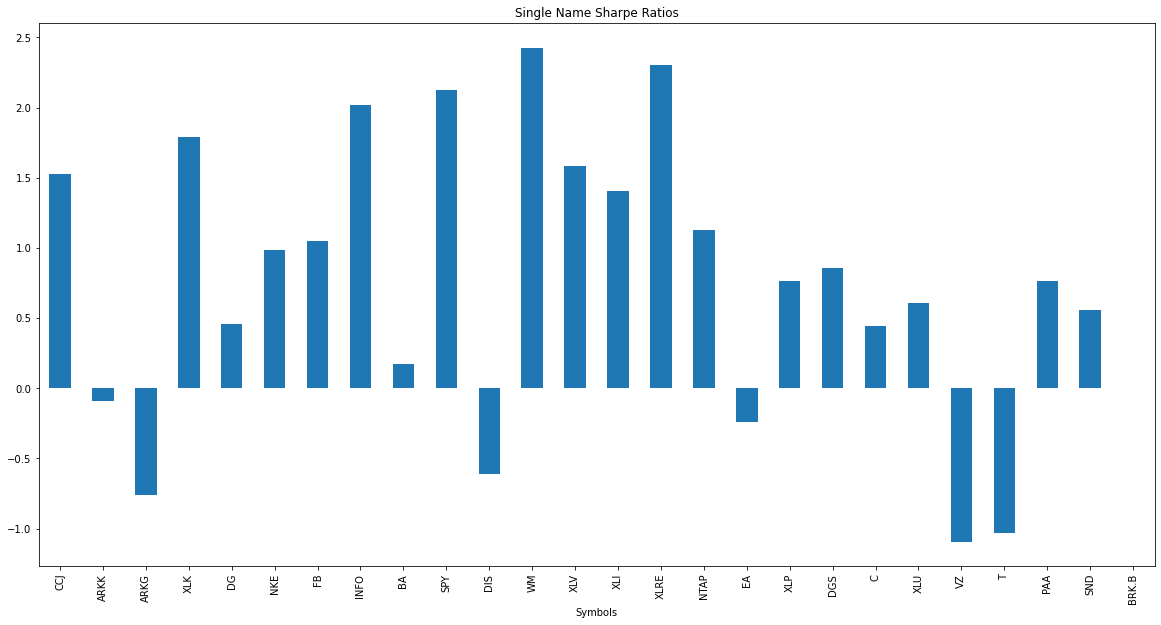

In [138]:
#sharpe ratios 
average_annual_return = daily_percent_change.mean()*252
annualized_std_deviaton = daily_percent_change.std()*252**(1/2)
sharpe_ratios= average_annual_return/annualized_std_deviaton

sharpe_ratios.plot.bar(figsize=(20,10),title = 'Single Name Sharpe Ratios');


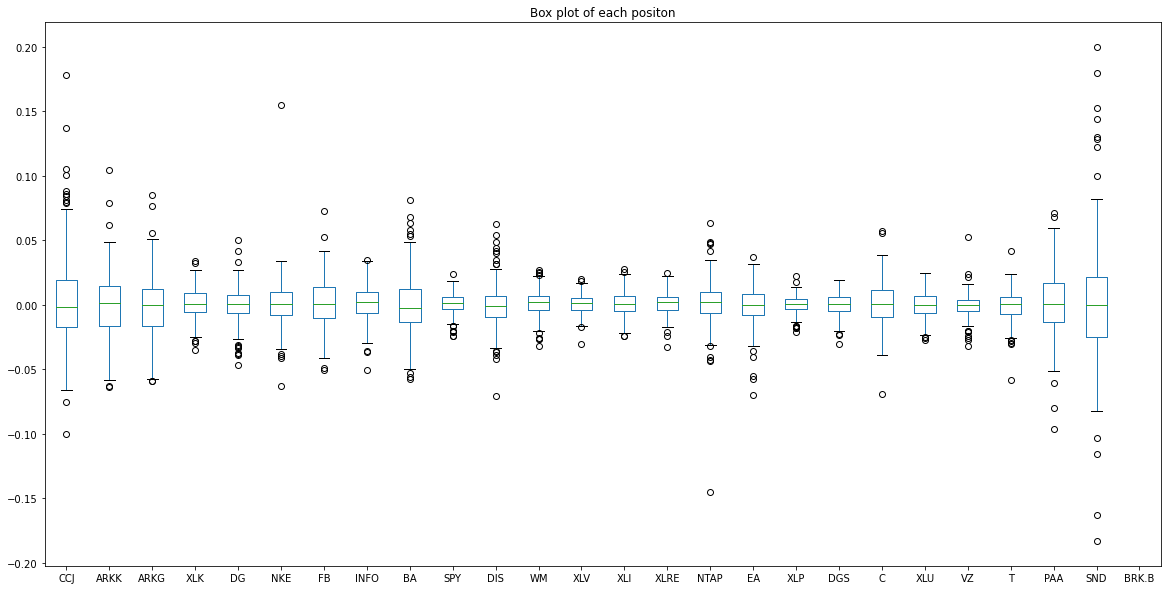

In [139]:
daily_percent_change.plot.box(figsize = (20,10), title = 'Box plot of each positon');

In [121]:
cumulative_returns = (1+daily_percent_change).cumprod()-1
cumulative_returns.hvplot.line(figsize= (20,10), title='YTD Cumulative Returns')

:NdOverlay   [Symbols]
   :Curve   [Date]   (value)

In [59]:
daily_percent_change.hvplot.line(figsize =(20,10))

:NdOverlay   [Symbols]
   :Curve   [Date]   (value)

In [153]:
daily_balance.hvplot.line(title = 'Daily AUM for 2021')

:Curve   [index]   (Account value)